# Classification for multiple classes based on softmax and cross entropy

## import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [4]:
directory_data  = '/Users/lyuwan-u/Desktop/2021-2/assignment-machine-learning-project/assignment04'
filename_data   = 'assignment_04_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000, 5)
*************************************************
size of x_test : (4500, 28, 28)
size of y_test : (4500, 5)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 4500
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [5]:
nClass = y_train.shape[1]
print('number of classes: ', nClass)

number of classes:  5


## label data

In [6]:
print('label data for training image 0: ', y_train[0])
print('label data for training image 1: ', y_train[2000])
print('label data for training image 2: ', y_train[4000])
print('label data for training image 3: ', y_train[6000])
print('label data for training image 4: ', y_train[8000])


label data for training image 0:  [1. 0. 0. 0. 0.]
label data for training image 1:  [0. 1. 0. 0. 0.]
label data for training image 2:  [0. 0. 1. 0. 0.]
label data for training image 3:  [0. 0. 0. 1. 0.]
label data for training image 4:  [0. 0. 0. 0. 1.]


## vectorize image data

In [7]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('dimension of the training data matrix: ', vector_x_train.shape)
print('dimension of the testing data matrix: ', vector_x_test.shape)

print('dimension of the trainin label data: ', y_train.shape)
print('dimension of the testing label data: ', y_test.shape)

dimension of the training data matrix:  (10000, 784)
dimension of the testing data matrix:  (4500, 784)
dimension of the trainin label data:  (10000, 5)
dimension of the testing label data:  (4500, 5)


## index for each class

In [8]:
index_train = [[0] for i in range(nClass)]
index_test  = [[0] for i in range(nClass)]

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

for i in range(nClass):

    index_train[i]  = [[j for j in range(len(y_train)) if y_train[j][i] == 1]]
    index_test[i]   = [[j for j in range(len(y_test)) if y_test[j][i] == 1]]

    number_index_train[i]   = len(index_train[i][0])
    number_index_test[i]    = len(index_test[i][0])

print('number of training images for each class: ', number_index_train)
print('number of testing images for each class: ', number_index_test)


number of training images for each class:  [2000. 2000. 2000. 2000. 2000.]
number of testing images for each class:  [900. 900. 900. 900. 900.]


## plot data

In [10]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [11]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

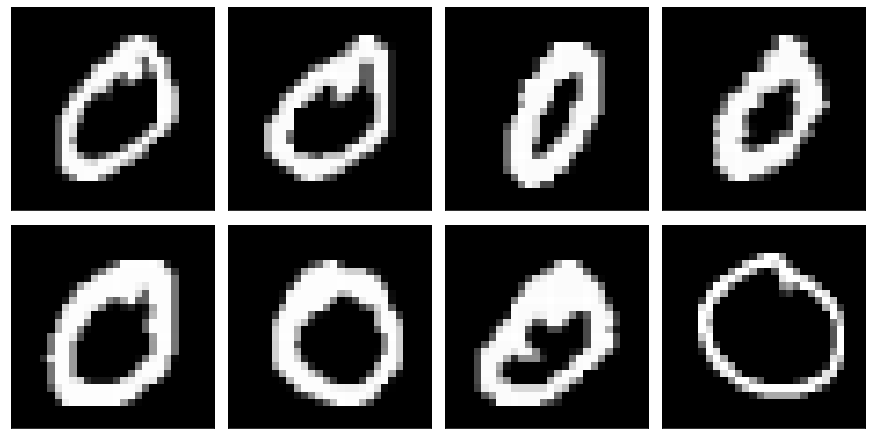

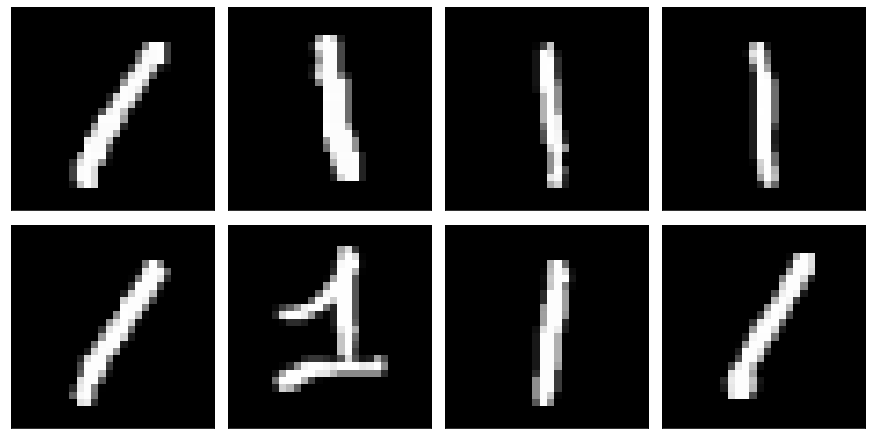

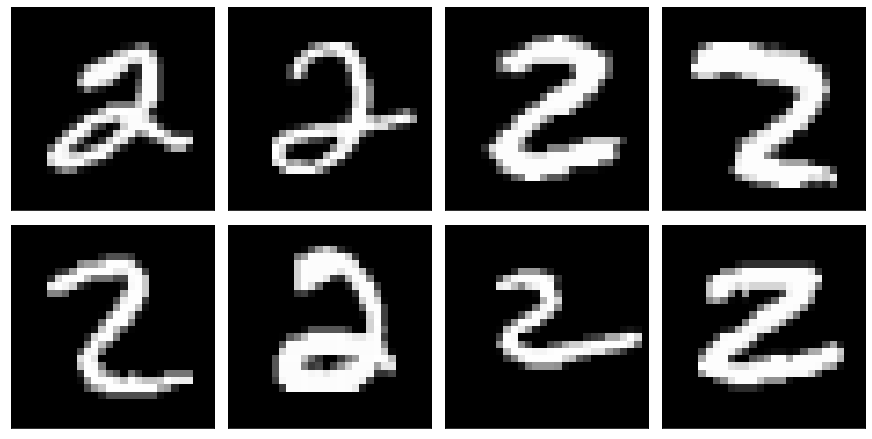

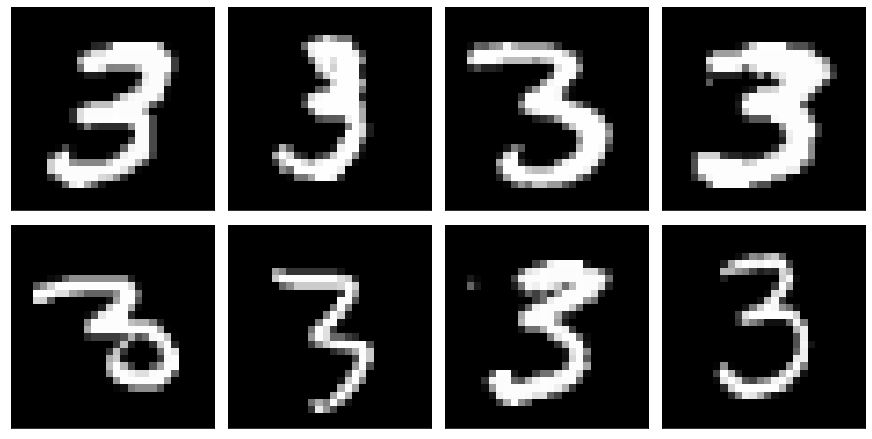

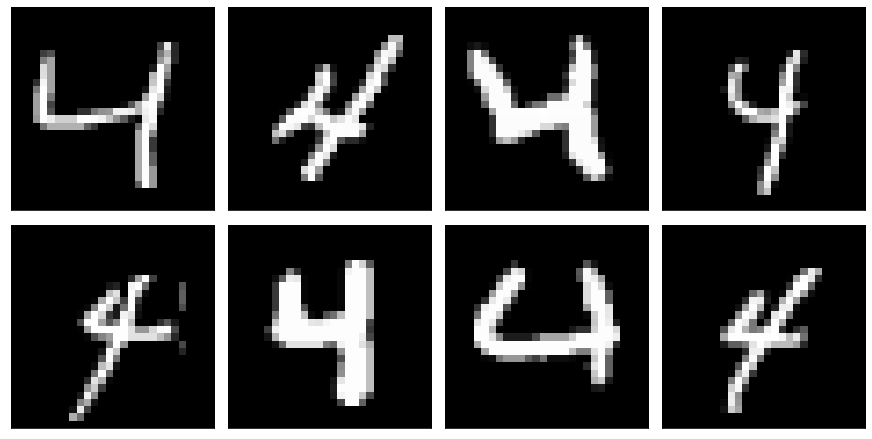

In [12]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [13]:
dim_input   = vector_x_train.shape[1]
dim_output  = nClass
weight      = np.ones((dim_output, dim_input))
weight      = weight * 0.001

print('size of weights: ', weight.shape)

size of weights:  (5, 784)


In [14]:
def layer_linear(input, weight):

    output = np.dot(input,weight.T)

    return output

## Softmax function

In [15]:
def activation_softmax(input):

    input_exp = np.exp(input)
    partition = input_exp.sum(axis=1,keepdims=True)
    output = input_exp / partition

    return output

## compute prediction by the forward propagation of the neural network

In [16]:
def compute_prediction(input, weight):

    output      = layer_linear(input,weight)
    prediction  = activation_softmax(output)

    return prediction

## compute loss function

In [17]:
def compute_loss(prediction, label):

    pred = np.log(prediction)
    loss = -(np.sum(np.sum(label*pred,axis=1)))/label.shape[0]
    return loss

In [18]:
compute_loss(compute_prediction(vector_x_train,weight),y_train)

1.6094379124340998

In [19]:
t = np.dot((compute_prediction(vector_x_train,weight)-y_train).T,vector_x_train)
print(t.shape)

(5, 784)


## compute gradient

In [20]:
def compute_gradient(input, prediction, label):

    gradient = np.dot((prediction-label).T,input)
    gradient = gradient / len(label)

    return gradient

In [21]:
compute_gradient(vector_x_train,compute_prediction(vector_x_train,weight),y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## compute accuracy

In [22]:
temp = compute_prediction(vector_x_train,weight)
print(temp)
print(max(temp[0]))
print(np.where(temp[0]==max(temp[0])))


[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 ...
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
0.2
(array([0, 1, 2, 3, 4]),)


In [23]:
def compute_accuracy(prediction, label):

    bCorrect    = [True if list(prediction[i]).index(max(prediction[i]))==list(label[i]).index(1) else False for i in range(len(label))]
    accuracy    = np.sum(bCorrect) / len(label)

    return accuracy

In [24]:
compute_accuracy(compute_prediction(vector_x_train,weight),y_train)

0.2

## initialize weight

In [25]:
dim_input   = vector_x_train.shape[1]
dim_output  = nClass
weight      = np.ones((dim_output, dim_input))
weight      = weight * 0.001

print('size of weights: ', weight.shape)

size of weights:  (5, 784)


## hyper-parameters

In [26]:
number_iteration    = 2000
learning_rate       = 0.5 

## variables for optimization information

In [27]:
loss_train_iteration        = np.zeros(number_iteration)
loss_test_iteration         = np.zeros(number_iteration)

accuracy_train_iteration    = np.zeros(number_iteration)
accuracy_test_iteration     = np.zeros(number_iteration)

pred_train_mean_iteration   = np.zeros((nClass, number_iteration)) 
pred_train_std_iteration    = np.zeros((nClass, number_iteration)) 
pred_test_mean_iteration    = np.zeros((nClass, number_iteration)) 
pred_test_std_iteration     = np.zeros((nClass, number_iteration)) 

## gradient descent iterations

In [28]:
for i in tqdm(range(number_iteration)):

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    gradient_train      = compute_gradient(vector_x_train,prediction_train,y_train)
    weight              = weight - learning_rate * gradient_train

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    loss_train          = compute_loss(prediction_train,y_train)
    loss_test           = compute_loss(prediction_test,y_test)

    accuracy_train      = compute_accuracy(prediction_train,y_train)
    accuracy_test       = compute_accuracy(prediction_test, y_test)

    for j in range(nClass):

        pred_train    = prediction_train[index_train[j][0]][:, j]
        pred_test     = prediction_test[index_test[j][0]][:, j]

        pred_train_mean_iteration[j, i] = np.mean(pred_train)
        pred_train_std_iteration[j, i]  = np.std(pred_train)
        
        pred_test_mean_iteration[j, i]  = np.mean(pred_test)
        pred_test_std_iteration[j, i]   = np.std(pred_test)

    loss_train_iteration[i]         = loss_train
    loss_test_iteration[i]          = loss_test

    accuracy_train_iteration[i]     = accuracy_train 
    accuracy_test_iteration[i]      = accuracy_test

100%|██████████| 2000/2000 [04:42<00:00,  7.09it/s]


## plot curve

In [29]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [30]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [31]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [32]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve

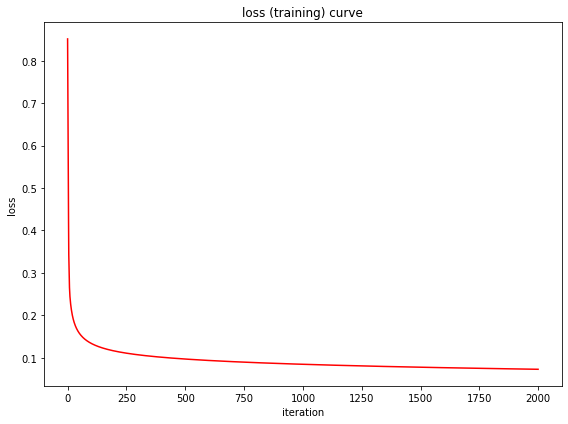

In [33]:
plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

## loss (testing) curve

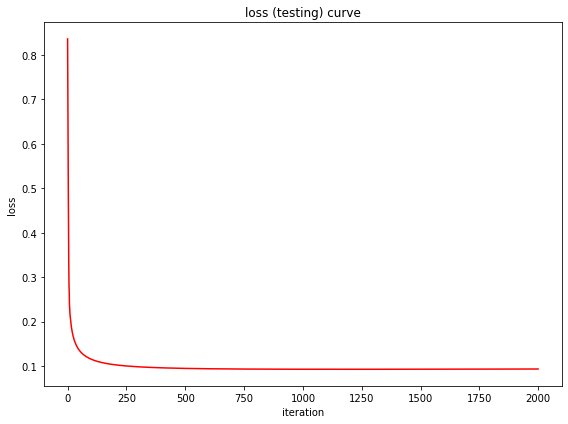

In [34]:
plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

## accuracy (training) curve

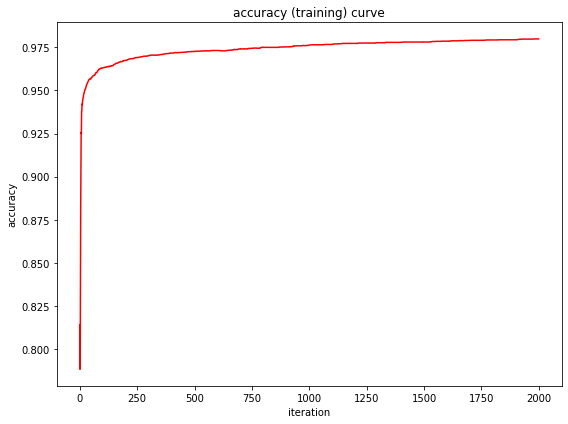

In [35]:
plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

## accuracy (testing) curve

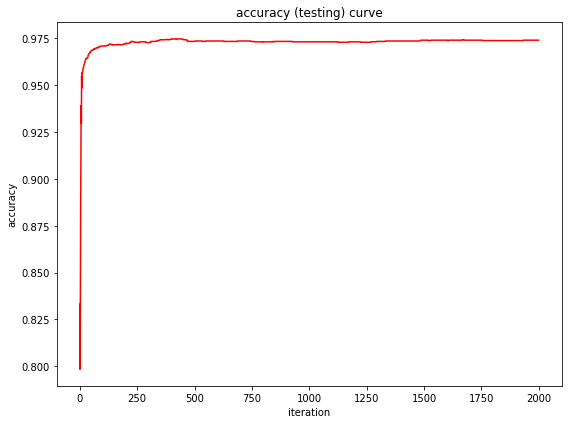

In [36]:
plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

## plot prediction values

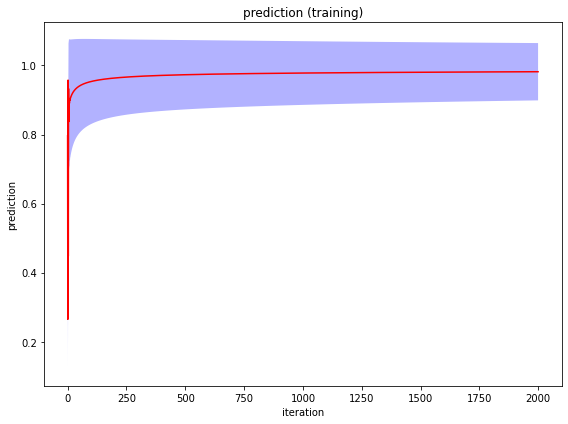

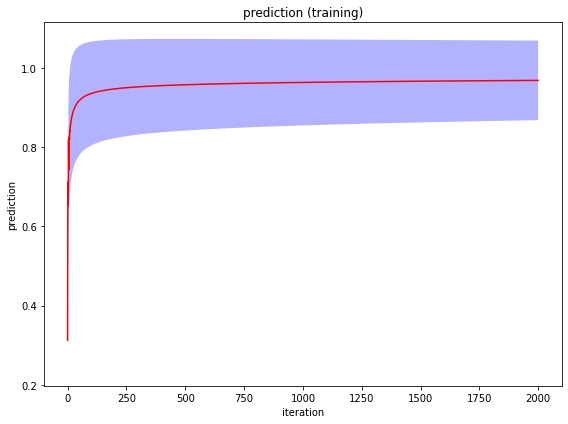

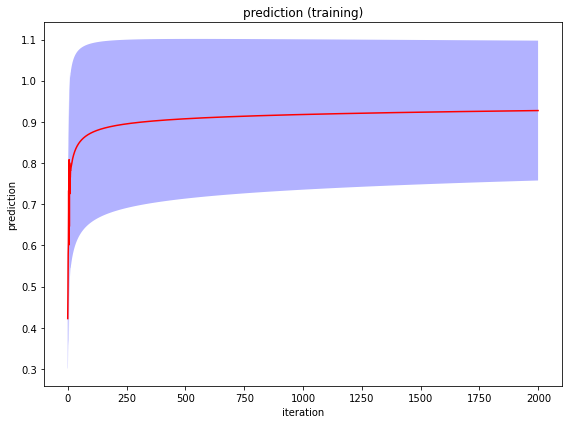

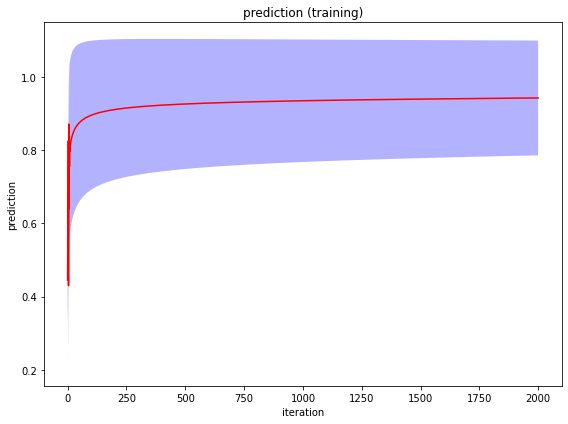

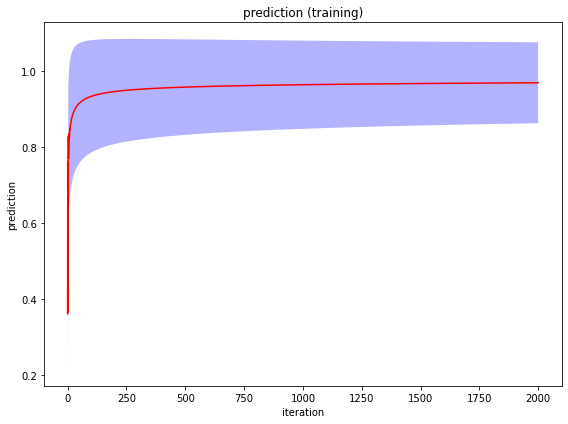

In [37]:
for i in range(nClass):
    
    plot_curve_error(pred_train_mean_iteration[i], pred_train_std_iteration[i], 'iteration', 'prediction', 'prediction (training)')

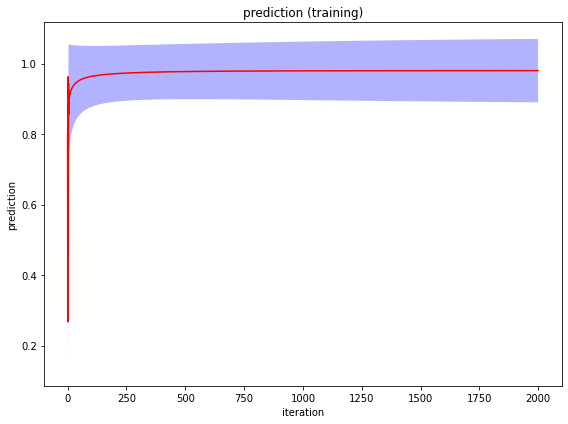

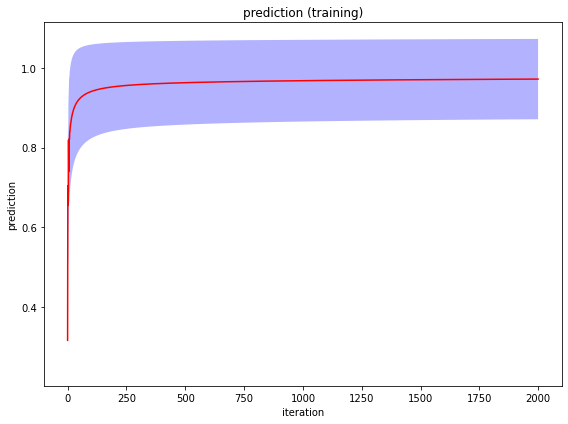

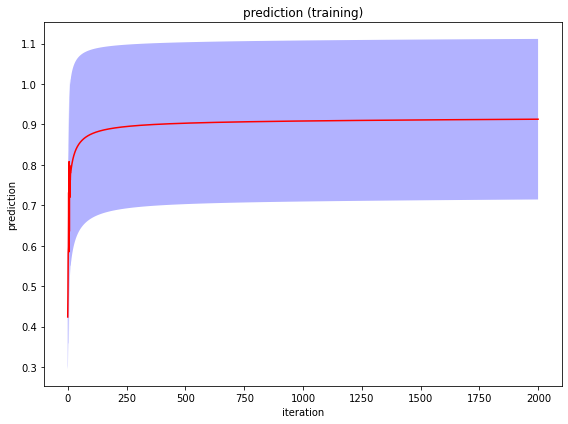

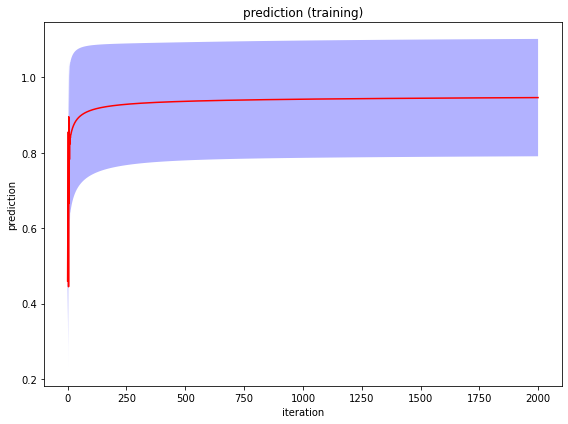

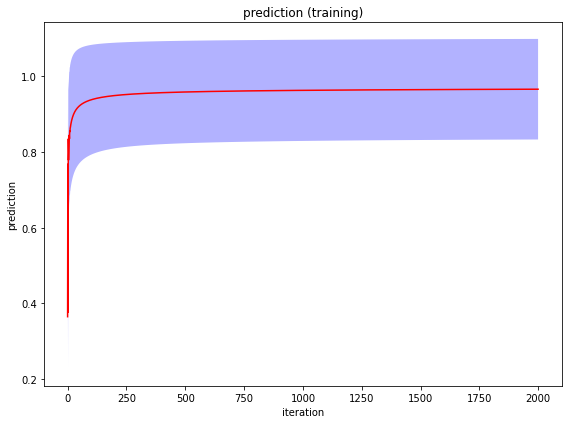

In [38]:
for i in range(nClass):
    
    plot_curve_error(pred_test_mean_iteration[i], pred_test_std_iteration[i], 'iteration', 'prediction', 'prediction (training)')

## print values

In [39]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [40]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss

In [41]:
print_curve(loss_train_iteration, index)

index =    0, value = 0.8516388787
index =  100, value = 0.1339429389
index =  200, value = 0.1157748007
index =  300, value = 0.1069166127
index =  400, value = 0.1011699953
index =  500, value = 0.0969356204
index =  600, value = 0.0935861772
index =  700, value = 0.0908157813
index =  800, value = 0.0884532877
index =  900, value = 0.0863934761


## testing loss

In [42]:
print_curve(loss_test_iteration, index)

index =    0, value = 0.8360542535
index =  100, value = 0.1155831250
index =  200, value = 0.1030645859
index =  300, value = 0.0984429816
index =  400, value = 0.0961438411
index =  500, value = 0.0948397523
index =  600, value = 0.0940481203
index =  700, value = 0.0935513893
index =  800, value = 0.0932376237
index =  900, value = 0.0930438257


## training accuracy

In [43]:
print_curve(accuracy_train_iteration, index)

index =    0, value = 0.8142000000
index =  100, value = 0.9630000000
index =  200, value = 0.9674000000
index =  300, value = 0.9701000000
index =  400, value = 0.9716000000
index =  500, value = 0.9725000000
index =  600, value = 0.9731000000
index =  700, value = 0.9739000000
index =  800, value = 0.9749000000
index =  900, value = 0.9752000000


## testing accuracy

In [44]:
print_curve(accuracy_test_iteration, index)

index =    0, value = 0.8331111111
index =  100, value = 0.9708888889
index =  200, value = 0.9720000000
index =  300, value = 0.9726666667
index =  400, value = 0.9744444444
index =  500, value = 0.9733333333
index =  600, value = 0.9735555556
index =  700, value = 0.9735555556
index =  800, value = 0.9731111111
index =  900, value = 0.9733333333


## functions for presenting the results

In [45]:
def function_results_01(data,nRow,nCol):  
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[0][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

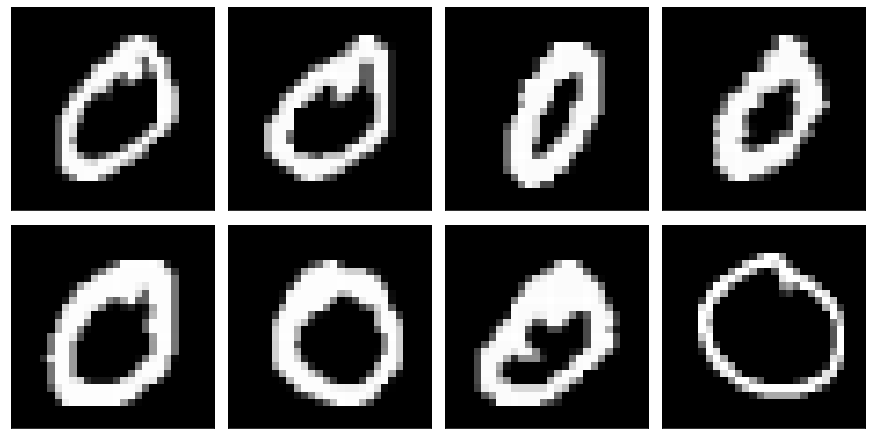

In [46]:
function_results_01(x_train,2,4)

In [49]:
def function_results_02(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[1][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()


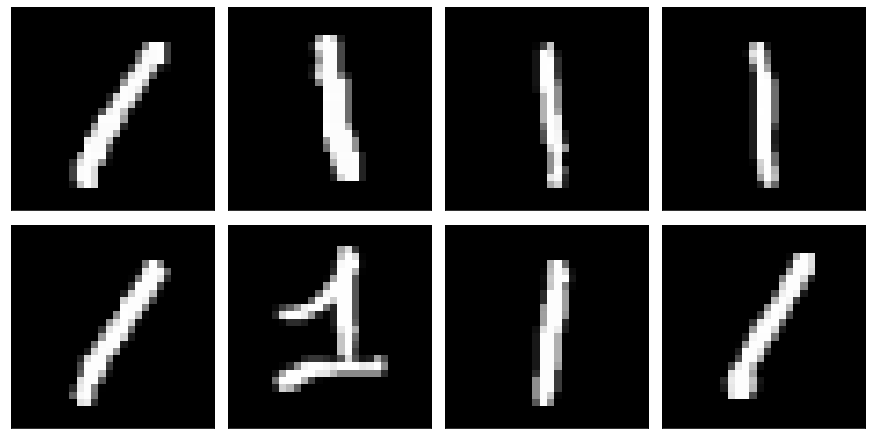

In [50]:
function_results_02(x_train,2,4)

In [52]:
def function_results_03(data,nRow,nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))
    nPlot     = nRow * nCol

    index_data = index_train[2][0][0:nPlot]

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

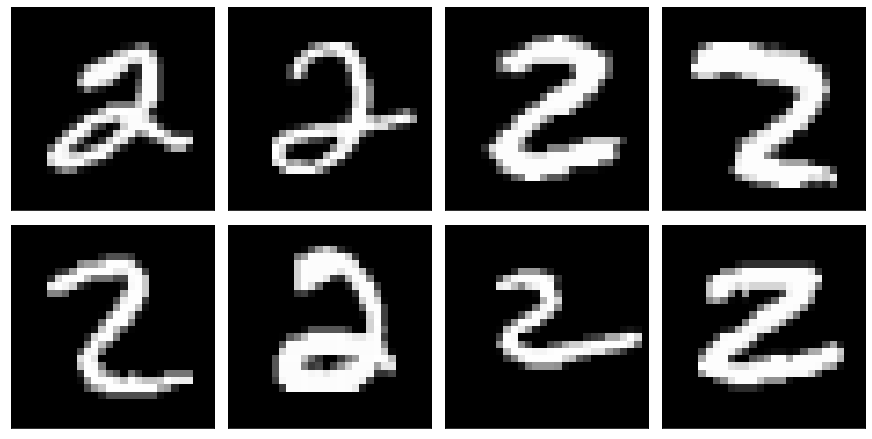

In [53]:
function_results_03(x_train,2,4)

In [ ]:
def function_results_04(*args):
    
    pass

In [ ]:
def function_results_05(*args):
    
    pass

In [ ]:
def function_results_06(*args):
    
    pass

In [ ]:
def function_results_07(*args):
    
    pass

In [ ]:
def function_results_08(*args):
    
    pass

In [ ]:
def function_results_09(*args):
    
    pass

In [ ]:
def function_results_10(*args):
    
    pass

In [ ]:
def function_results_11(*args):
    
    pass

In [ ]:
def function_results_12(*args):
    
    pass

In [ ]:
def function_results_13(*args):
    
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

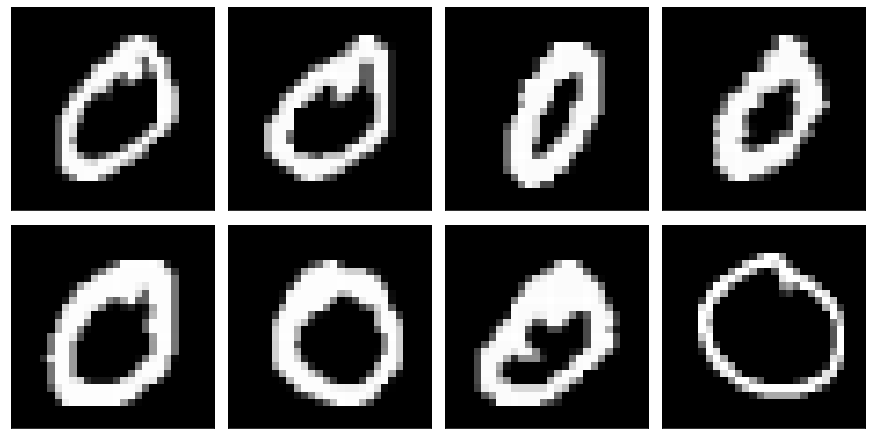

In [63]:
function_results_01(...)

## # 02. plot the input images for '1'

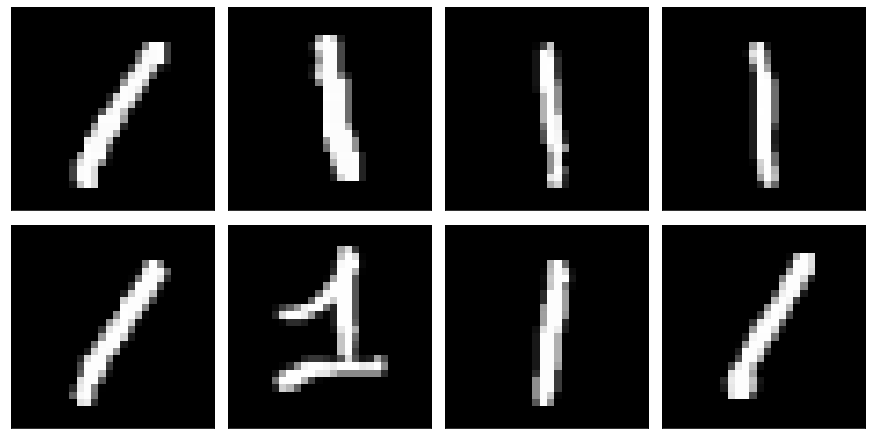

In [64]:
function_results_02(...)

## # 03. plot the input images for '2'

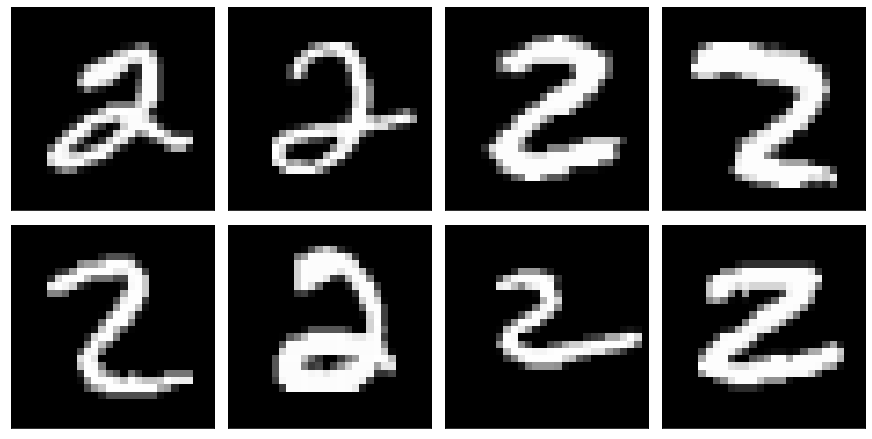

In [65]:
function_results_03(...)

## # 04. plot the input images for '3'

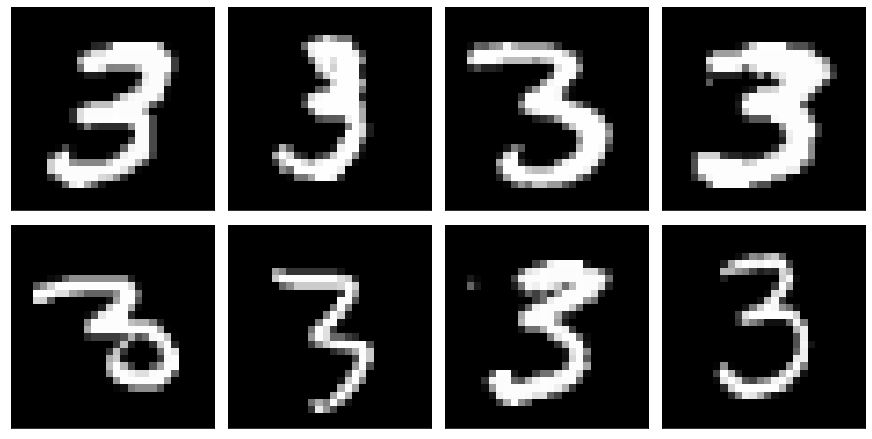

In [66]:
function_results_04(...)

## # 05. plot the input images for '4'

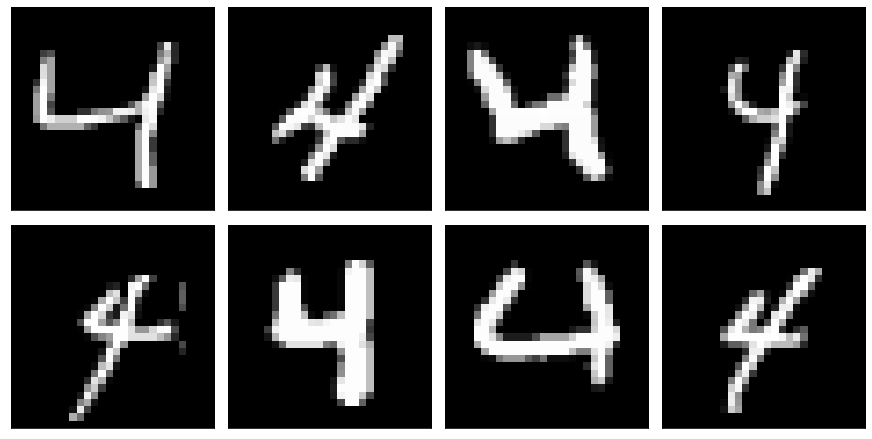

In [67]:
function_results_05(...)

## # 06. plot the training loss curve (x-axis: iteration, y-axis: loss)

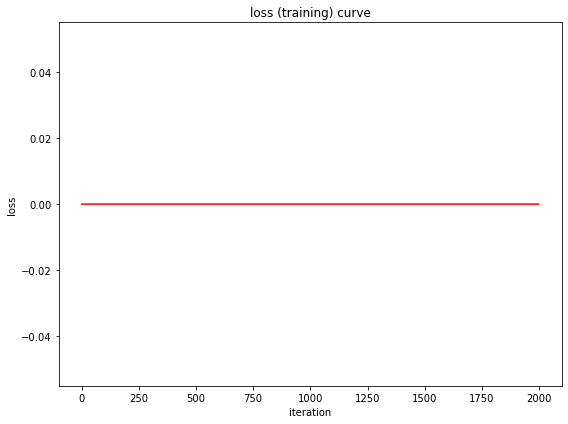

In [36]:
function_results_06(...)

## # 07. plot the testing loss curve (x-axis: iteration, y-axis: loss)

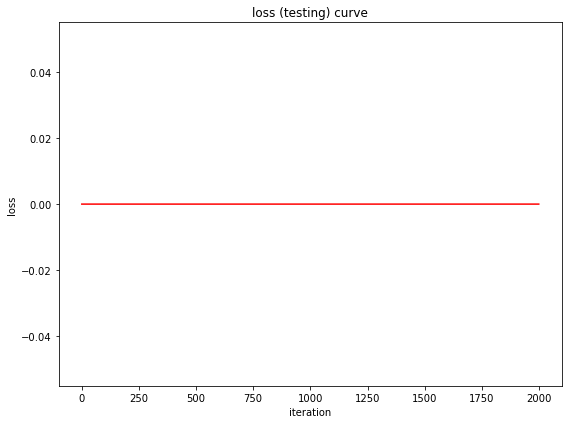

In [37]:
function_results_07(...)

## # 08. plot the training accuracy curve (x-axis: iteration, y-axis: accuracy)

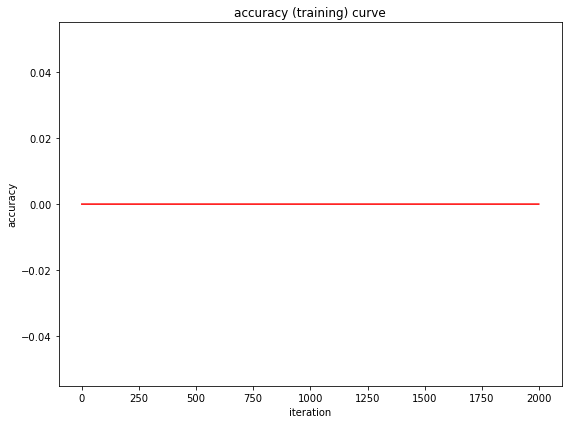

In [38]:
function_results_08(...)

## # 09. plot the testing accuracy curve (x-axis: iteration, y-axis: accuracy)

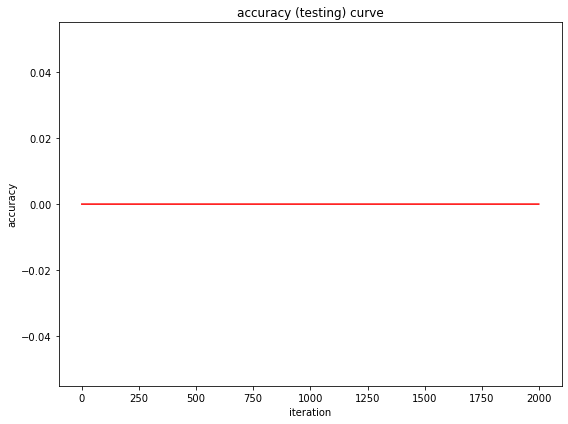

In [39]:
function_results_09(...)

## # 10. print the training loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [40]:
function_results_10(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 11. print the testing loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [41]:
function_results_11(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 12. print the training accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [42]:
function_results_12(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 13. print the testing accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [43]:
function_results_13(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000
